<img src="https://upload.wikimedia.org/wikipedia/en/thumb/a/a9/Griffith_University_Logo_Variant_2022.svg/1200px-Griffith_University_Logo_Variant_2022.svg.png" width=200>

# Job Market Data Analysis - 3803ICT Data Analytics Assignment
### School of ICT - Griffith University

* Thiago Guerino Amaral - s5286821
* Pitiputt Hanson - s5293353

In [ ]:
# Imports required for the analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Part 1 - Data Preparation & Preprocessing

In [2]:
df = pd.read_csv("data.csv")
print(f"Dataset shape: {df.shape}")

Dataset shape: (318477, 13)


/var/folders/5y/8424r3fs7n75_9whz6__djl40000gn/T/ipykernel_21642/2393152782.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


In [3]:
df.head(3)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [5]:
df.describe()

,LowestSalary,HighestSalary
count,318477.000000,318477.000000
mean,65.813544,114.432342
std,51.063125,177.594941
min,0.000000,30.000000
25%,30.000000,40.000000
50%,60.000000,70.000000
75%,100.000000,120.000000
max,200.000000,999.000000


In [6]:
# Store unique counts in a dictionary
unique_counts = {
    'Id': df['Id'].nunique(),
    'Title': df['Title'].nunique(),
    'Company': df['Company'].nunique(),
    'Date': df['Date'].nunique(),
    'Location': df['Location'].nunique(),
    'Area': df['Area'].nunique(),
    'Classification': df['Classification'].nunique(),
    'SubClassification': df['SubClassification'].nunique(),
    'Requirement': df['Requirement'].nunique(),
    'FullDescription': df['FullDescription'].nunique(),
    'LowestSalary': df['LowestSalary'].nunique(),
    'HighestSalary': df['HighestSalary'].nunique(),
    'JobType': df['JobType'].nunique(),
}

unique_counts_df = pd.DataFrame.from_dict(unique_counts, orient='index', columns=['Unique Values'])
print(unique_counts_df)

                   Unique Values
Id                        318477
Title                     168065
Company                    40628
Date                         163
Location                      65
Area                          19
Classification                30
SubClassification            338
Requirement               234287
FullDescription           250901
LowestSalary                  11
HighestSalary                 11
JobType                        4


## 1.1 Dataset Description
The job market dataset is a collection of job listings from seek.com.au, capturing listings from October 2018 to March 2019. It contains 318,477 listings (rows) and 13 attributes (columns).
<ul>
  <li><b>Categories/Domains:</b> The dataset’s main categorical variables are Classification and Location. The Classification attribute categorises job listings into industry domains, with SubClassification further dividing these into role-specific subdomains. The Location attribute categorises listings into cities or regions, with Area further specifying suburbs.</li>
  <li><b>Dataset Size of Each Variation:</b> The dataset includes 318,477 unique job listings (ID), 168,065 job titles, 40,628 companies, 163 dates, 65 locations, 19 areas, 30 classifications, 338 sub-classifications, 234,287 requirements, 250,901 full descriptions, 11 salary ranges for both LowestSalary and HighestSalary, and 4 job types.</li>
  <li><b>Structure/Format:</b> The dataset is a CSV file with 13 columns. Most attributes are of object datatype (categorical or textual), while LowestSalary and HighestSalary are numerical (int64). All fields except ID, Title, LowestSalary, and HighestSalary contain missing data, which will require preprocessing.</li>
  <li><b>Attributes/Features Used:</b> For the primary analysis of job distribution and salary predictions, we will use Location and Classification. For salary analysis, we will derive several fields from LowestSalary and HighestSalary: AverageSalary for the mean, NormalisedAverageSalary for predictive modeling, and BinnedSalaries for salary distribution analysis. Date is used for trends over time, JobType for employment type distribution, and Requirement for extracting required skills.
</li>
  <li><b>Parts of the Dataset Used:</b> We will use most attributes, excluding ID, Title, FullDescription, and Company. The ID column is a unique identifier with no analytical value. Title and FullDescription are unstructured text fields that can't be analysed without text processing. The Company field is not relevant to this analysis. All of these fields will be dropped for simplification.</li>
</ul>

## 1.2 Data Preparation & Preprocessing

### Handling Duplicates

Drop the ID column first, otherwise duplicates won't be detected.

In [7]:
# Drop redundant 'ID' column
df.drop(['Id'], axis=1, inplace=True)

In [8]:
# Identify exact duplicates and duplicates ignoring Date
exact_duplicates = df.duplicated().sum()
duplicates_ignore_date = df.duplicated(subset=df.columns.difference(['Date'])).sum()

print(f"Number of exact duplicate rows (all columns identical): {exact_duplicates}")
print(f"Number of duplicate rows ignoring Date column: {duplicates_ignore_date}")
print(f"Difference: {duplicates_ignore_date - exact_duplicates}")

Number of exact duplicate rows (all columns identical): 8607
Number of duplicate rows ignoring Date column: 15331
Difference: 6724


In [9]:
# Remove exact duplicate rows
df.drop_duplicates(inplace=True)
print(f"Dataset shape after removing exact duplicates: {df.shape}")

Dataset shape after removing exact duplicates: (309870, 12)


After removing duplicates, drop the other redundant columns. If done prior, there will far more listings flagged as duplicates.

In [10]:
# Drop other redundant columns
df.drop(['Title', 'FullDescription', 'Company'], axis=1, inplace=True)

### Transform Date Column

In [11]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

### Handling Missing Values

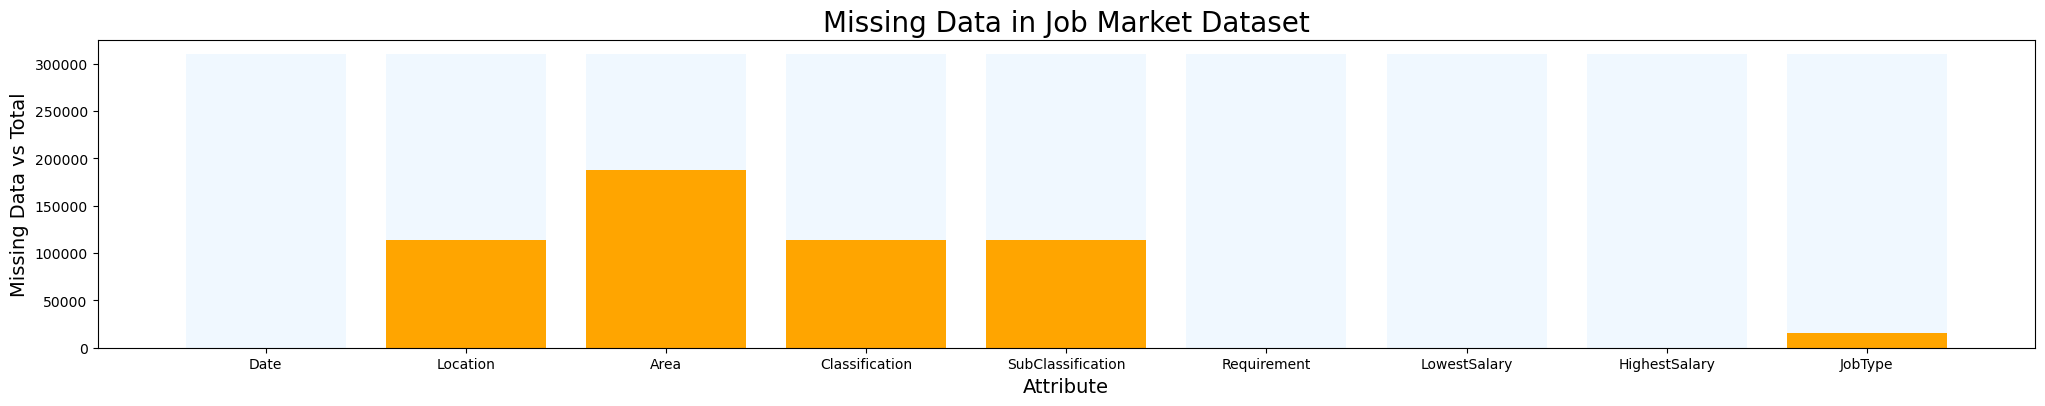

In [12]:
# Finding missing values
nulls = df.isnull().sum()
total_data = [df.shape[0]] * df.shape[1]
plt.figure(figsize=(25,4))
plt.bar(df.columns.values, total_data, color='aliceblue')
plt.bar(df.columns.values, nulls, color='orange')
plt.ylabel('Missing Data vs Total', size=14)
plt.xlabel('Attribute', size=14)
plt.title('Missing Data in Job Market Dataset', size=20)
plt.show()

In [13]:
# Calculate and print percentage of missing values
missing_percentages = (nulls / df.shape[0]) * 100

print("Percentage of Missing Values by Column:")
for column, percent in missing_percentages.items():
    print(f"{column}: {percent:.2f}%")

Percentage of Missing Values by Column:
Date: 0.00%
Location: 36.65%
Area: 60.59%
Classification: 36.65%
SubClassification: 36.65%
Requirement: 0.00%
LowestSalary: 0.00%
HighestSalary: 0.00%
JobType: 5.01%


In [14]:
# Investigate locations with non-null Area values
non_null_area = df[df['Area'].notna()]['Location'].unique()
total_rows = df.shape[0]
print("Locations with non-null Area values:", sorted(non_null_area))
print(f"Percentage of dataset with non-null Area: {(df['Area'].notna().sum() / total_rows * 100):.2f}%")

Locations with non-null Area values: ['Brisbane', 'Melbourne', 'Perth', 'Sydney']
Percentage of dataset with non-null Area: 39.41%


In [15]:
# Identify rows where Classification, SubClassification, and Location are all missing
all_missing = df[df[['Classification', 'SubClassification', 'Location']].isnull().all(axis=1)]

# Identify the date range where this missing pattern occurs
missing_start = all_missing['Date'].min()
missing_end = all_missing['Date'].max()

print(f"Missing values for all 3 fields first appear on: {missing_start}")
print(f"And last appear on: {missing_end}")

# Count how many total rows fall in this date range
date_filtered = df[(df['Date'] >= missing_start) & (df['Date'] <= missing_end)]
print(f"Total job listings between {missing_start} and {missing_end}: {len(date_filtered)}")

# Check what percent of these rows have all 3 fields missing
missing_in_range = date_filtered[['Classification', 'SubClassification', 'Location']].isnull().all(axis=1).sum()
print(f"Number of rows in this range with all 3 fields missing: {missing_in_range}")
print(f"Percentage of rows in this range with all 3 missing: {(missing_in_range / len(date_filtered)) * 100:.2f}%")

Missing values for all 3 fields first appear on: 2018-12-16
And last appear on: 2019-03-13
Total job listings between 2018-12-16 and 2019-03-13: 114792
Number of rows in this range with all 3 fields missing: 113577
Percentage of rows in this range with all 3 missing: 98.94%


In [16]:
# Drop rows where all three essential fields are missing
df = df.dropna(subset=['Location', 'Classification', 'SubClassification'], how='all')

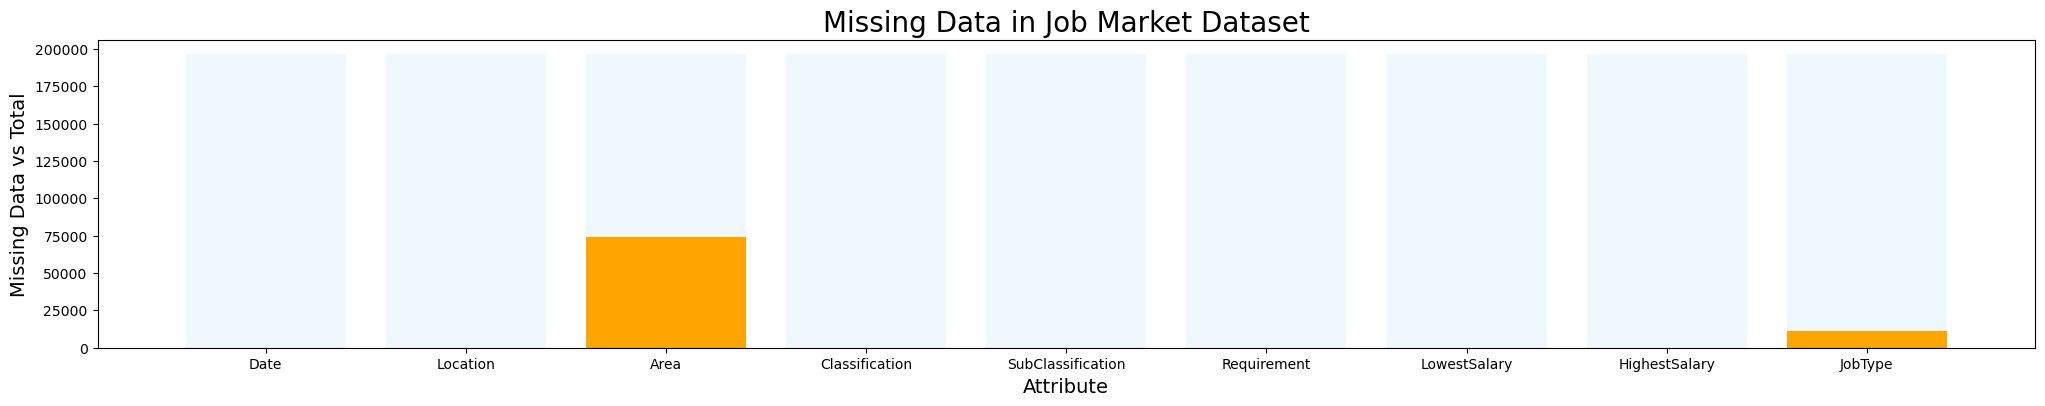

In [17]:
# Finding missing values
nulls = df.isnull().sum()
total_data = [df.shape[0]] * df.shape[1]
plt.figure(figsize=(25,4))
plt.bar(df.columns.values, total_data, color='aliceblue')
plt.bar(df.columns.values, nulls, color='orange')
plt.ylabel('Missing Data vs Total', size=14)
plt.xlabel('Attribute', size=14)
plt.title('Missing Data in Job Market Dataset', size=20)
plt.show()

In [18]:
# Calculate and print percentage of missing values
missing_percentages = (nulls / df.shape[0]) * 100

print("Percentage of Missing Values by Column:")
for column, percent in missing_percentages.items():
    print(f"{column}: {percent:.2f}%")

Percentage of Missing Values by Column:
Date: 0.00%
Location: 0.00%
Area: 37.79%
Classification: 0.00%
SubClassification: 0.00%
Requirement: 0.00%
LowestSalary: 0.00%
HighestSalary: 0.00%
JobType: 5.80%


### Preprocess Salaries

In [19]:
# Create average salary column
df['AverageSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2

In [20]:
# Normalise average salary
scaler = MinMaxScaler()
df['NormalisedAverageSalary'] = scaler.fit_transform(df[['AverageSalary']])

### Show Preprocessed Data

In [21]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (196293, 11)


In [22]:
# Show data after cleaning and preprocessing
df.head(3)

,Date,Location,Area,Classification,SubClassification,Requirement,LowestSalary,HighestSalary,JobType,AverageSalary,NormalisedAverageSalary
0,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,0,30,NaN,15.0,0.0
1,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,0,30,NaN,15.0,0.0
2,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,0,30,NaN,15.0,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196293 entries, 0 to 197228
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Date                     196293 non-null  object 
 1   Location                 196293 non-null  object 
 2   Area                     122107 non-null  object 
 3   Classification           196293 non-null  object 
 4   SubClassification        196293 non-null  object 
 5   Requirement              196289 non-null  object 
 6   LowestSalary             196293 non-null  int64  
 7   HighestSalary            196293 non-null  int64  
 8   JobType                  184909 non-null  object 
 9   AverageSalary            196293 non-null  float64
 10  NormalisedAverageSalary  196293 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 18.0+ MB


## 1.3 Dataset Preparation and Preprocessing Summary

The job market dataset was loaded into a DataFrame using the read_csv() function from the Pandas library. To prepare the dataset for analysis, a series of data preparation and preprocessing steps were applied.
### Duplicated Data
<ul>
  <li> The dataset initially contained 8,607 exact duplicate rows (all columns identical after dropping the 'Id' column) and 15,331 duplicates when ignoring the 'Date' column, indicating 6,724 listings reposted on different dates. Removing exact duplicates reduced the dataset to 309,870 rows with 12 columns.</li>
  <li> This high duplication rate suggests potential data collection issues, such as repeated scraping, which could inflate job listing counts if unaddressed. The reposted listings suggests employers were renewing postings, but could bias analyses of unique job opportunities. Removing duplicates streamlined the dataset, improving the accuracy of statistical summaries and predictive models, though it slightly reduced the dataset size.</li>
</ul>

### Missing Data
<ul>
    <li> Missing values were significant, initially affecting Area (60.59%), Location (36.65%), Classification (36.65%), SubClassification (36.65%), and JobType (5.01%).</li>
    <li> Firstly, the attribute with the most missing values was addressed - Area. Locations with non-null Area values were found to be Brisbane, Melbourne, Perth, and Sydney. This suggests that Area is a conditional field that is only filled in for the 4 biggest cities in Australia. This makes sense, as less populated regions do not require specification of Area, as Location is sufficient.</li>
    <li> The next finding was that Location, Classification, and SubClassification were all missing exactly 36.65% of their data, which suggests it is not a mere coincidence. Upon further investigation, it was found that 98.94% of rows from December 16, 2018, to March 13, 2019 (113,577 of 114,792) lacked these 3 attributes. Rows with all 3 attributes missing were dropped from the dataset, as Location and Classification are core to the analysis. It is unclear why 113,577 rows were missing these 3 essential fields, but we believe it is likely due to web scraping issues or website changes.</li>
    <li> After dropping these rows, the dataset were reduced from 309,870 rows to 196,293 rows. This limits the dataset to a 70 day range between 7th October 2018 to 16th December 2018, compared to the previous 157 day range between 7th October 2018 and 13th March 2019.</li>
    <li> Aftering dropping the rows, the JobType attribute contained 5.80% missing values, increased from 5.01% due to the larger proportion of the dataset those rows now take up. Also, the missing value percentage for Area decreased from 60.59% to 37.79%. Requirements is listed at 0.00% missing values because only 4 out 196293 rows are null. These 3 attributes will be left with missing values, but their impact with be considered.</li>
</ul>

### Other Preprocessing Steps
<ul>
    <li> In addtion to the 'Id' column, the columns Title', 'FullDescription', and 'Company' were dropped to focus on relevant attributes.</li>
    <li> The Date attribute was converted to date-only format to eliminate the time component, as it is not relevant to the analysis.</li>
    <li> An AverageSalary attribute was created using the mean of the LowestSalary and HighestSalary. Note that the assumption that AverageSalary represents actual salaries may oversimplify real-world salary offers.</li>
    <li> NormalisedAverageSalary was created using MinMaxScaler.</li>
</ul>

## 1.4 Hypotheses
<ul>
    <li> Most jobs will be located in major Australian cities such as Sydney, Melbourne, Brisbane, Perth, and Adelaide due to Australia's population distribution.</li>
    <li> The ICT sector will have the highest number of job listings due to high demand for technology across various industries.</li>
    <li> Healthcare and Manufactoring will be top 5 sectors for number of job listings because they are essential industries.</li>
    <li> Canberra (ACT) will have high-paying government roles as it is the captial and is home to the Parliament House.</li>
    <li> Mining towns or remote areas will offer high-paying jobs in resource sectors.</li>
    <li> Executive Management and Leadership roles will have the highest salaries due to the experience and responsibility required.</li>
    <li> Rural locations will be underrepresented in this dataset because employers in these areas may prefer local and word-of-mouth advertising compared to online services like seek.com.au.</li>
</ul>

## Part 2 - Analysis & Interpretation

### 2.1 Job Metadata

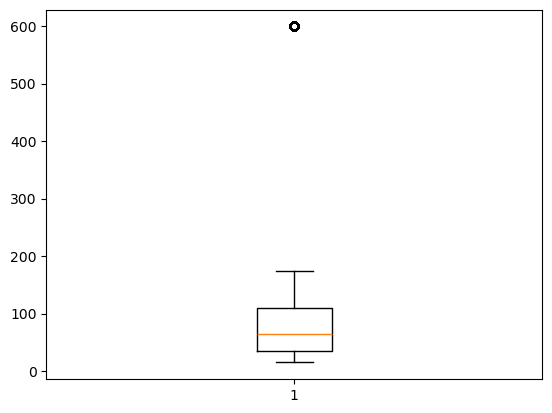

In [25]:
# Salary boxplot
plt.boxplot(df["AverageSalary"]);

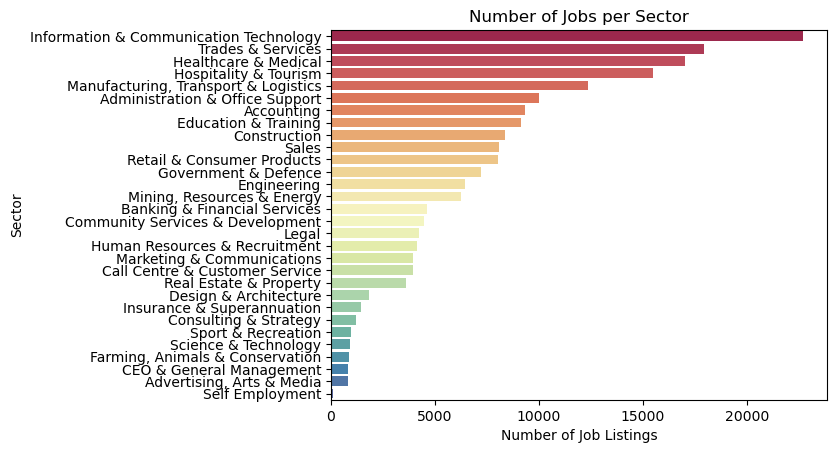

In [26]:
# Job sectors
sector_frequency = df["Classification"].value_counts()
sns.barplot(x=sector_frequency.values, y=sector_frequency.index, hue=sector_frequency.index, palette='Spectral')
plt.title('Number of Jobs per Sector')
plt.ylabel('Sector')
plt.xlabel('Number of Job Listings')
plt.show()

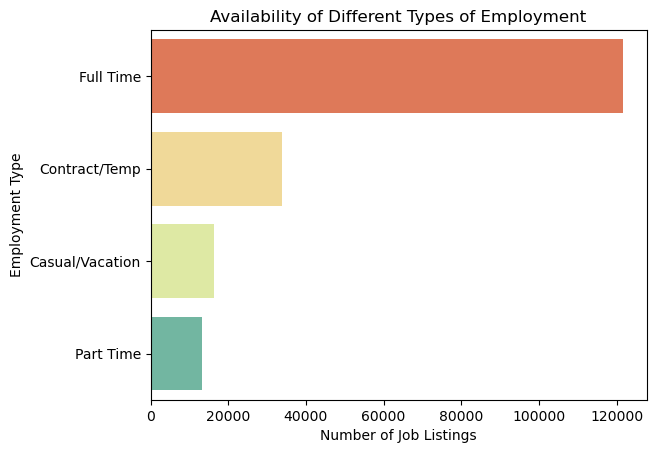

In [27]:
# Job types
job_type_frequency = df["JobType"].value_counts()
sns.barplot(x=job_type_frequency.values, y=job_type_frequency.index, hue=job_type_frequency.index, palette='Spectral')
plt.title('Availability of Different Types of Employment')
plt.ylabel('Employment Type')
plt.xlabel('Number of Job Listings')
plt.show()

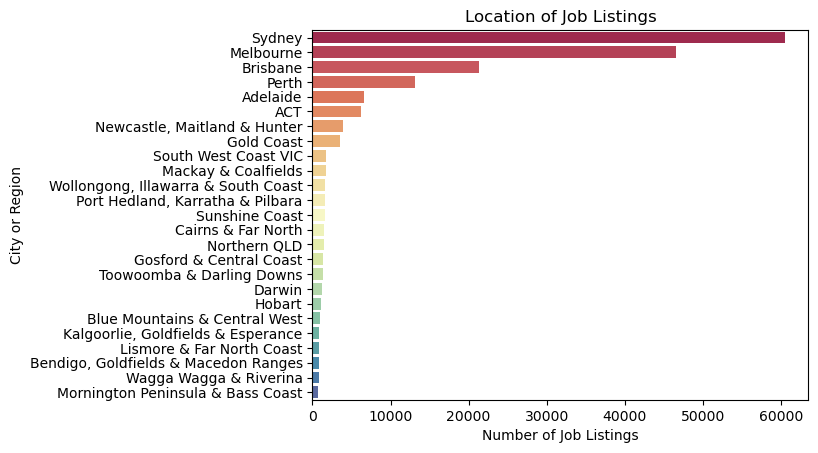

In [28]:
# Job locations
location_frequency = df["Location"].value_counts().iloc[:-40]
sns.barplot(x=location_frequency.values, y=location_frequency.index, hue=location_frequency.index, palette='Spectral')
plt.title('Location of Job Listings')
plt.ylabel('City or Region')
plt.xlabel('Number of Job Listings')
plt.show()

In [29]:
# Put average salaries into bins
bins = [0, 30, 45, 60, 75, 90, 105, 120, 135, 150, float('inf')]
labels = ['0-30K', '30-45K', '45-60K', '60-75K', '75-90K', '90-105K', '105-120K', '120-135K', '135-150K', '> 150K']
df['BinnedSalaries'] = pd.cut(df['AverageSalary'], bins=bins, labels=labels, right=False)

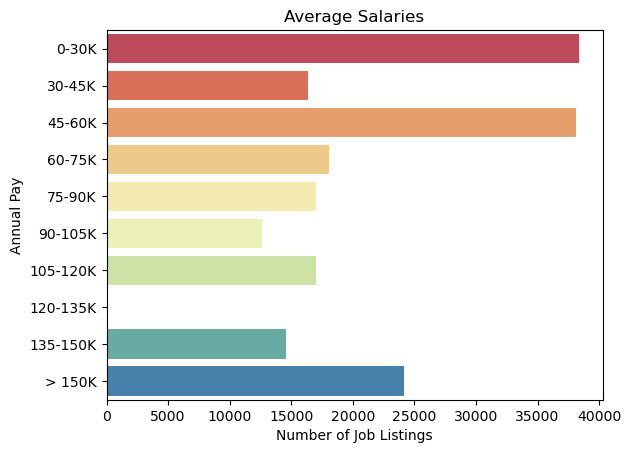

In [30]:
# Average salaries
salary_range_frequency = df["BinnedSalaries"].value_counts()
sns.barplot(x=salary_range_frequency.values, y=salary_range_frequency.index, hue=salary_range_frequency.index, palette='Spectral')
plt.title('Average Salaries')
plt.ylabel('Annual Pay')
plt.xlabel('Number of Job Listings')
plt.show()

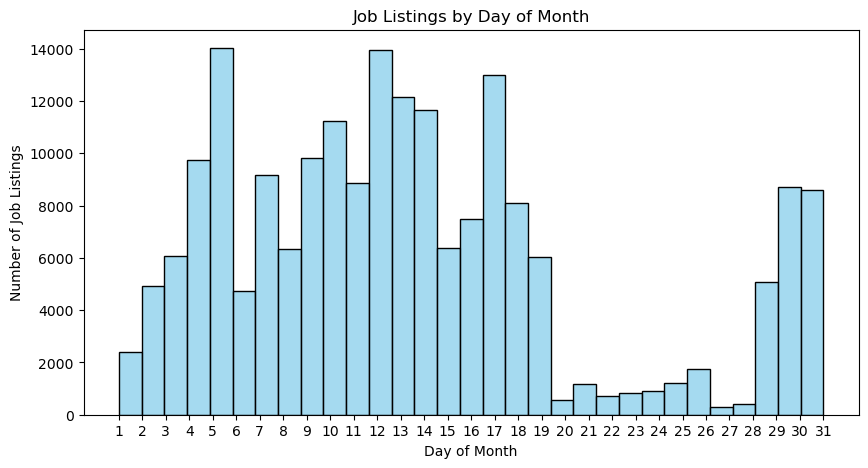

In [43]:
# Attempt to find pattern of job posting
df['Date'] = pd.to_datetime(df['Date'])
listing_seasonality_df = df.copy()
listing_seasonality_df['DayOfMonth'] = df['Date'].dt.day
plt.figure(figsize=(10, 5))
sns.histplot(listing_seasonality_df['DayOfMonth'], bins=31, color='skyblue')
plt.title('Job Listings by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Job Listings')
plt.xticks(range(1, 32))
plt.show()

#### 2.1.1 Job Metadata Summary

The Job metadata presented interesting high-level information about the dataset. The main key takeaways were the following:
- We can see indication of an outlier in the average salary data.
- ICT seems to be the dominant job sector overall.
- Large majority of job listings are for full-time positions, meaning part-time, casuals, or fixed contracts have limited opportinities.
- Sydney, Melbourne and Brisbane dominate the market in number of job listings, which is expected due to their high populations.
- The most common salary ranges were A$ 0-30,000 and A$ 45,000-60,000.
- We can quite clearly see a drop in job listings in the final week of the month.

### 2.2 Job Market by Location

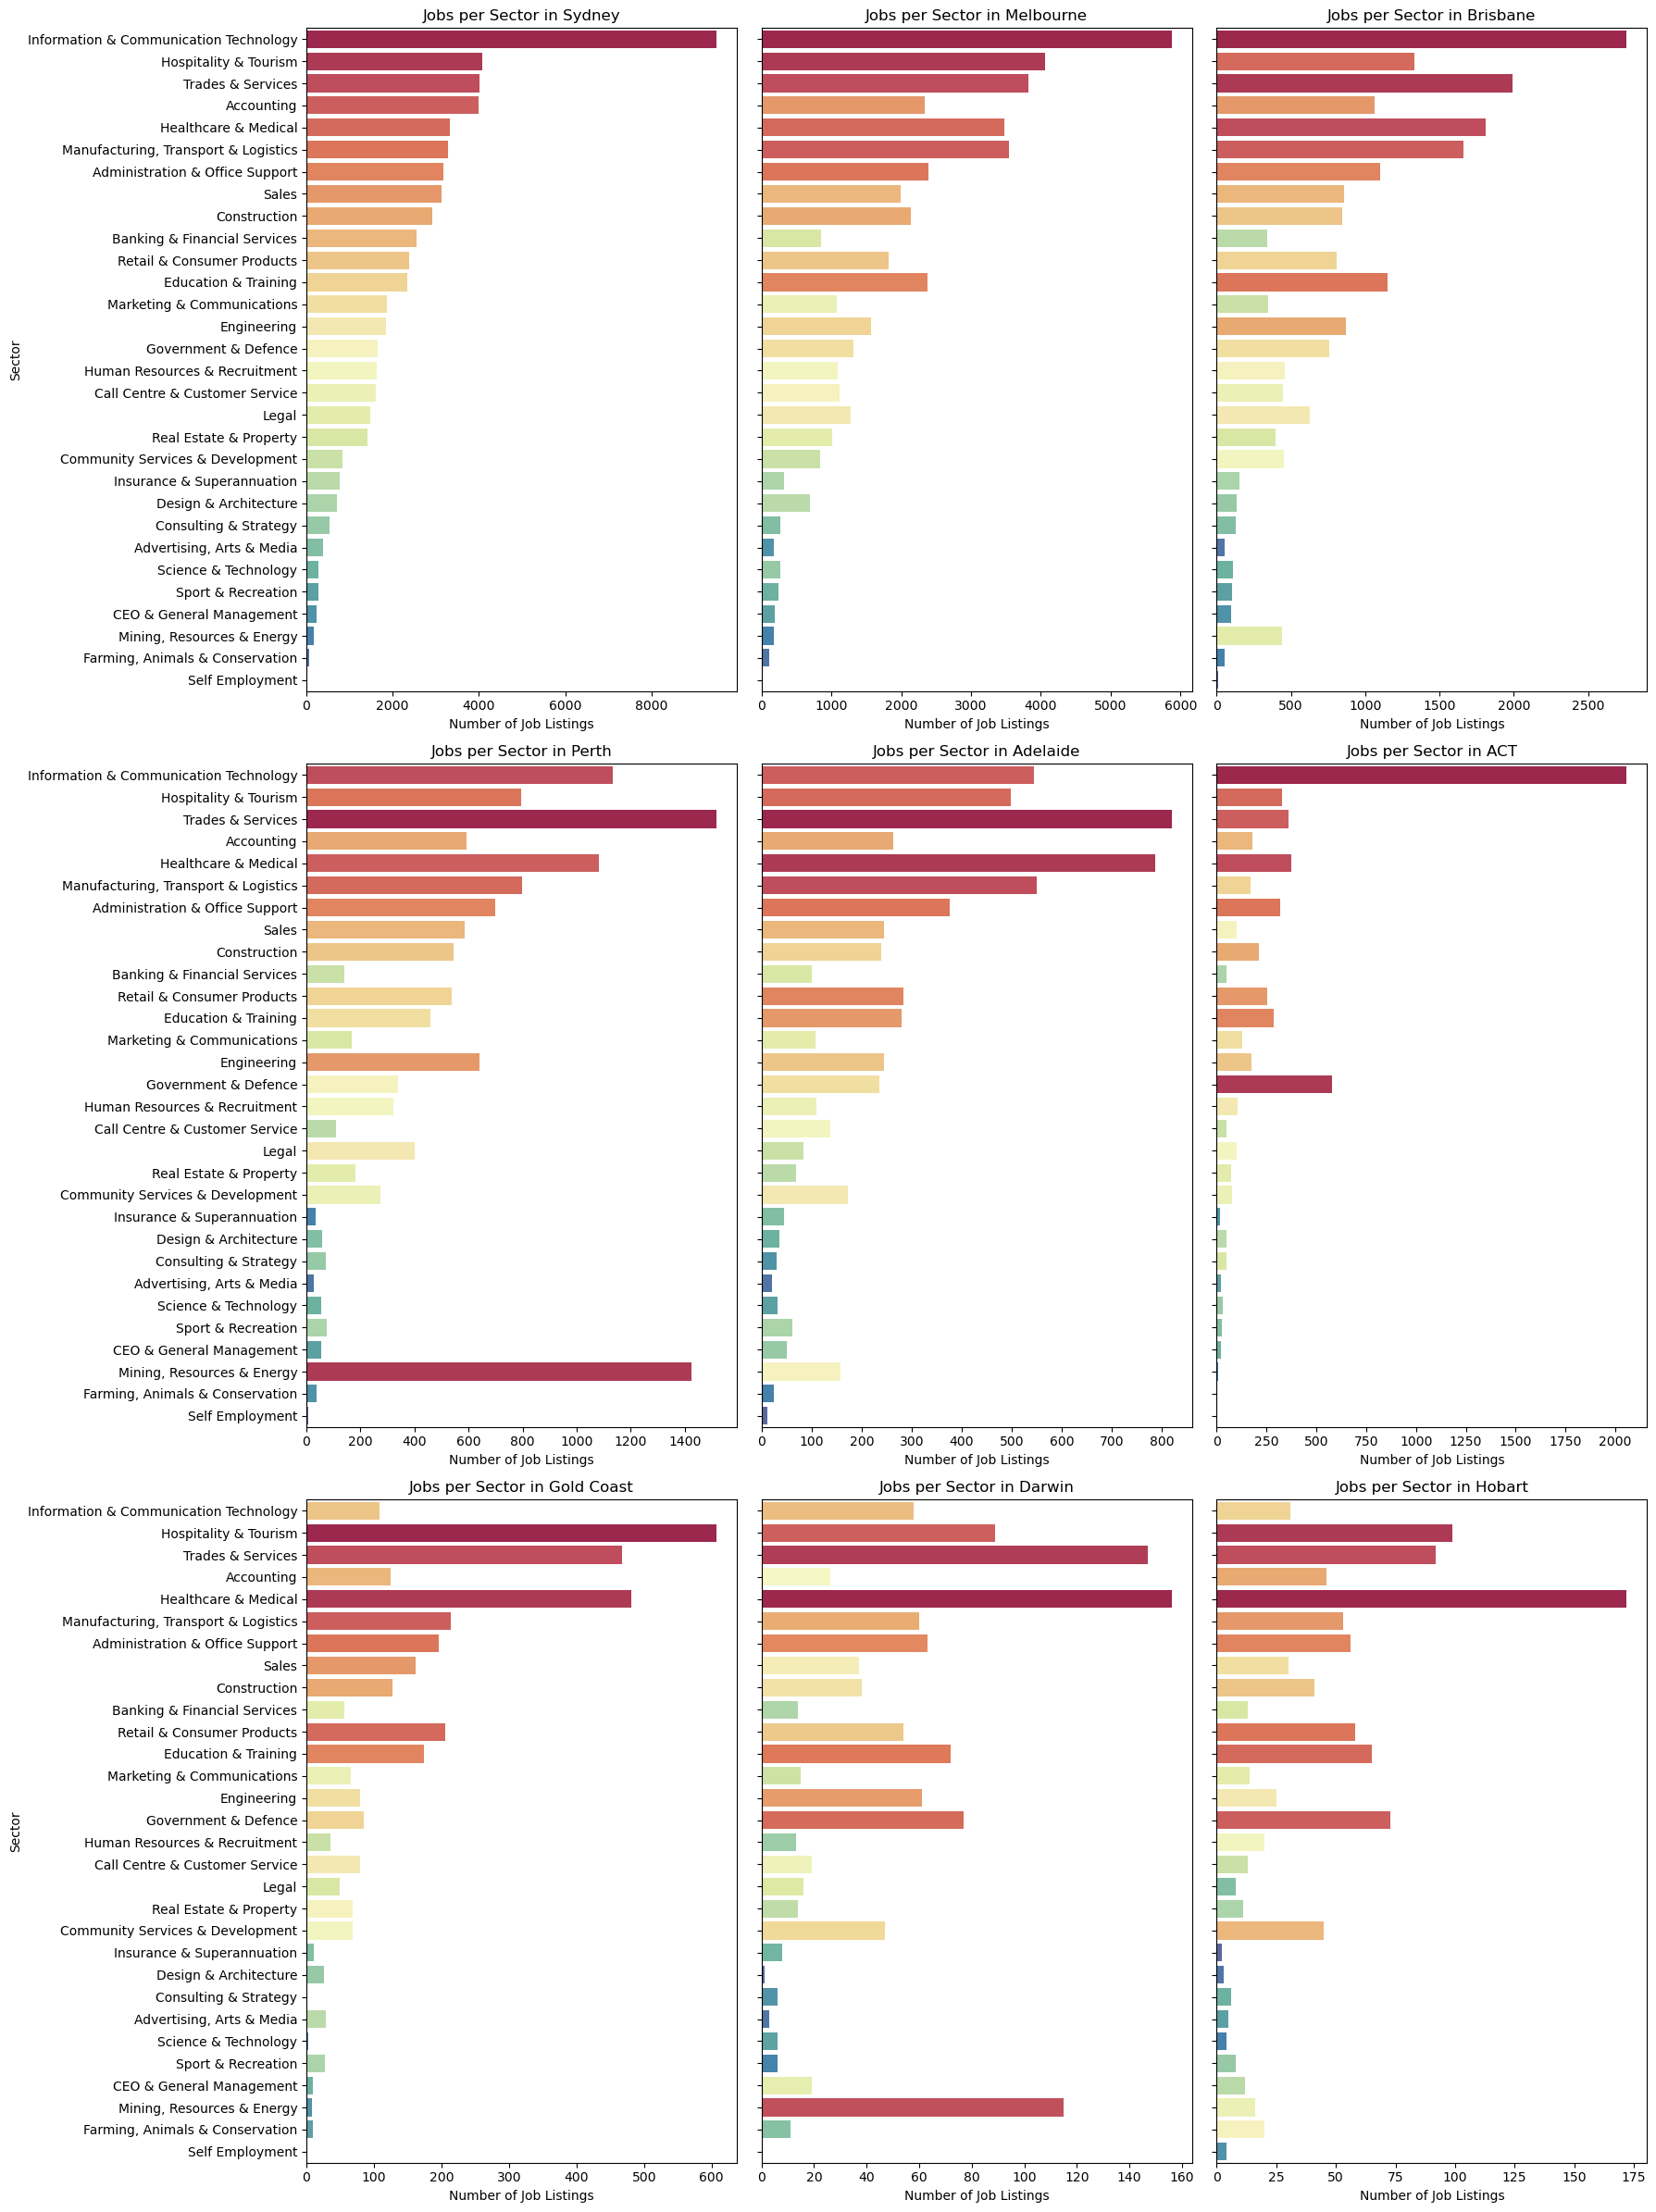

In [31]:
# Show the number of job listings per sector in each capital city plus Gold Coast
locations = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide', 'ACT', 'Gold Coast', 'Darwin', 'Hobart']

nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 8), sharey=True)
axes = axes.flatten()

for idx, location in enumerate(locations):
    location_df = df[df['Location'] == location]
    sector_frequency = location_df['Classification'].value_counts()
    sns.barplot(x=sector_frequency.values, y=sector_frequency.index, hue=sector_frequency.index, palette='Spectral', ax=axes[idx], legend=False)
    axes[idx].set_title(f'Jobs per Sector in {location}')
    axes[idx].set_xlabel('Number of Job Listings')

    if idx % 2 == 0:
        axes[idx].set_ylabel('Sector')
    else:
        axes[idx].set_ylabel('')

plt.tight_layout()
plt.show()

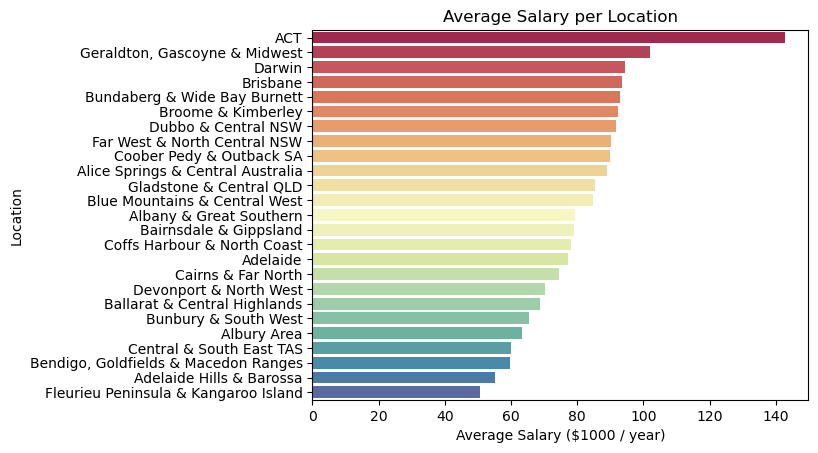

In [32]:
# Show the salary distribution in each city, order to see what cities pay more
salary_per_location_df = df.groupby('Location')['AverageSalary'].mean().reset_index().iloc[:-40]
salary_per_location_df = salary_per_location_df.sort_values('AverageSalary', ascending=False)

sns.barplot(data=salary_per_location_df, x='AverageSalary', y='Location', hue='Location', palette='Spectral')
plt.title('Average Salary per Location')
plt.ylabel('Location')
plt.xlabel('Average Salary ($1000 / year)')
plt.show()

/var/folders/5y/8424r3fs7n75_9whz6__djl40000gn/T/ipykernel_21642/3155747133.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.011806678383128296' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized[place] = (normalized[place] / populations[place])


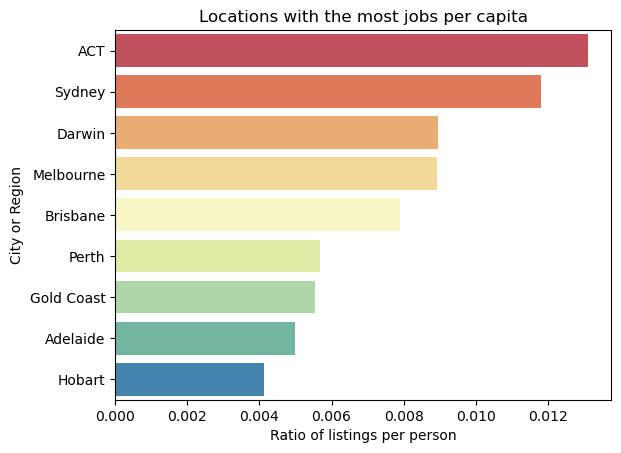

In [47]:
# Job opportunities as a fraction of population for top biggest cities
populations = {
    "Sydney": 5_121_000,
    "Melbourne": 5_208_068,
    "Brisbane": 2_707_133,
    "Perth": 2_311_629,
    "Adelaide": 1_322_132,
    "ACT": 473_855,
    "Gold Coast": 647_078,
    "Darwin": 139_902,
    "Hobart": 252_639
}

location_counts = df["Location"].value_counts()
normalized = location_counts.loc[location_counts.index.isin(set(populations.keys()))]
for place in normalized.index:
    normalized[place] = (normalized[place] / populations[place])
normalized = normalized.sort_values(ascending=False)

sns.barplot(x=normalized.values, y=normalized.index, hue=normalized.index, palette='Spectral')
plt.title('Locations with the most jobs per capita')
plt.ylabel('City or Region')
plt.xlabel('Ratio of listings per person')
plt.show()

#### 2.2.1 Job Market By Location Summary

Some valuable findings were uncovered by analysing the location component of the job data. 
- Different cities have different dominant industries, so it may make sense for a job seeker to move to a city where their industry is dominant. For instance:
  - ICT is the dominant sector in Sydney, Melbourne and Brisbane.
  - Hospitality and Tourism is the number 1 industry on the Gold Coast.
  - Healthcare & Medical dominante Darwin and Hobart.
- The location with the highest average salaries is by far the Australian Capital Territory (ACT).
  - This is true both in a simple average and when calculating the average salary per capita.
  - However, this is not unexpected due to the ACT's high concentration of politicians and government workers who tend to be quite well paid.

### 2.3 Job Market by Sector

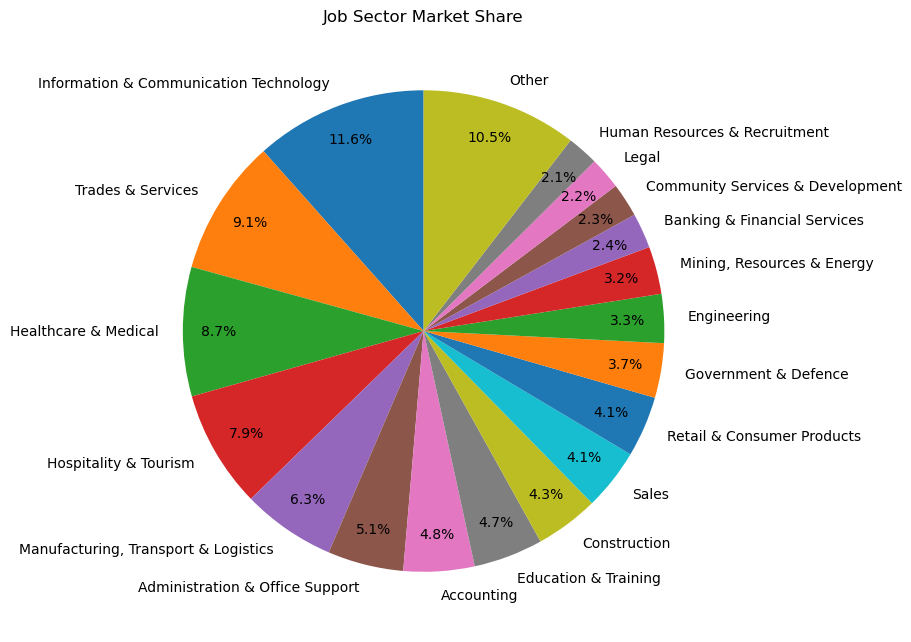

In [35]:
# Highest sector market share
sector_frequency = df["Classification"].value_counts()

top_sectors = sector_frequency.nlargest(18)
other_sum = sector_frequency.iloc[18:].sum()

sector_data = top_sectors.copy()
sector_data['Other'] = other_sum

plt.figure(figsize=(9, 9))
sector_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)

plt.title('Job Sector Market Share')
plt.ylabel('')
plt.tight_layout()
plt.show()

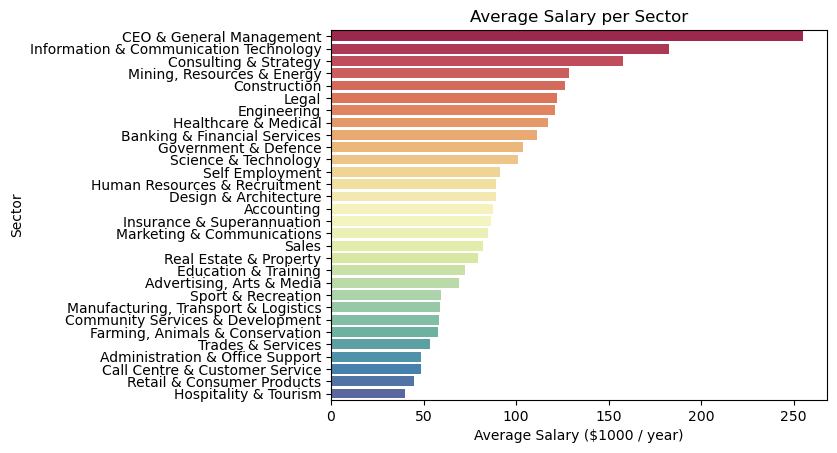

In [36]:
# Salary distribution per sector
salary_per_sector_df = df.groupby('Classification')['AverageSalary'].mean().reset_index()# .iloc[:-40]
salary_per_sector_df = salary_per_sector_df.sort_values('AverageSalary', ascending=False)

sns.barplot(data=salary_per_sector_df, x='AverageSalary', y='Classification', hue='Classification', palette='Spectral')
plt.title('Average Salary per Sector')
plt.ylabel('Sector')
plt.xlabel('Average Salary ($1000 / year)')
plt.show()

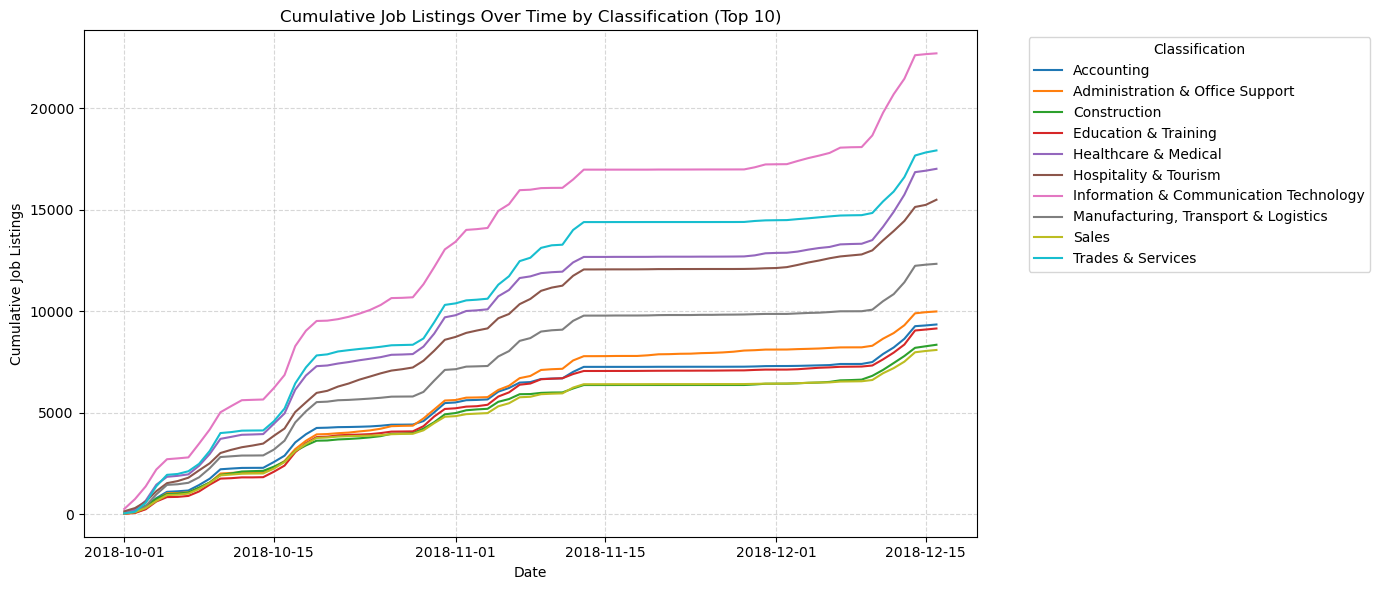

In [37]:
# Cumulative growth of job listings per sector
top_classes = df['Classification'].value_counts().nlargest(10).index
df_top = df[df['Classification'].isin(top_classes)]
grouped = df_top.groupby([df_top['Date'].dt.date, 'Classification']).size().unstack(fill_value=0).sort_index()
cumulative = grouped.cumsum()
plt.figure(figsize=(14, 6))
cumulative.plot(ax=plt.gca())

plt.title('Cumulative Job Listings Over Time by Classification (Top 10)')
plt.xlabel('Date')
plt.ylabel('Cumulative Job Listings')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Top 30 Words in ICT Job Requirements:
Manager: 1.0000
Business Analyst: 0.8735
support: 0.8325
Business: 0.7512
Lead: 0.7484
Developer: 0.6700
solution: 0.6594
system: 0.6092
technology: 0.5548
Engineer: 0.5180
development: 0.5067
application: 0.5053
strong: 0.5039
company: 0.5032
leading: 0.5018
organisation: 0.4940
digital: 0.4834
product: 0.4403
environment: 0.4375
service: 0.4311
design: 0.4071
delivery: 0.4042
Technical: 0.3943
Consultant: 0.3943
multiple: 0.3802
Location: 0.3774
global: 0.3746
enterprise: 0.3668
now: 0.3640
Infrastructure: 0.3611


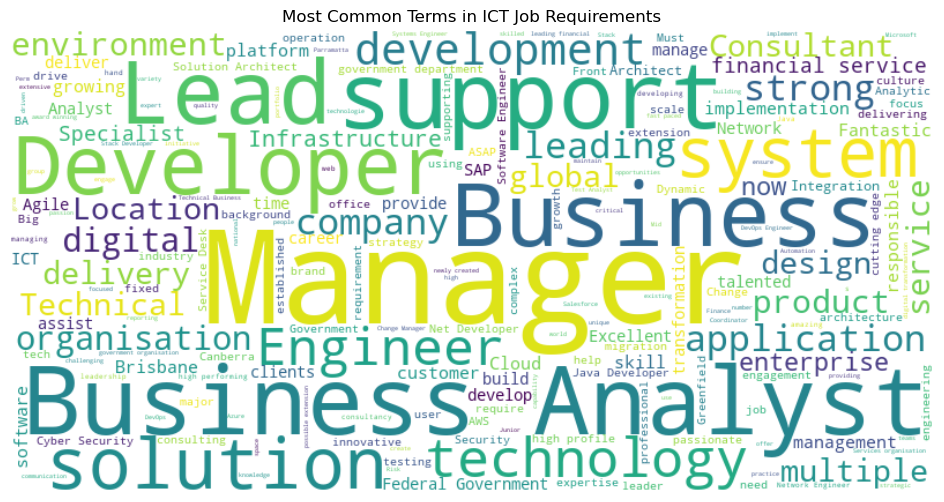

In [38]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the preprocessed DataFrame from your notebook
# Custom stopwords from your original code
custom_stopwords = [
    'store', 'join', 'looking', 'want', 'site', 'month', 'week', 'level', 'required', 'one', 'end', 'nsw',
    'positions', 'make', 'across', 'take', 'key', 'large', 'based', 'melbourne', 'staff', 'australia',
    'position', 'currently', 'full', 'projects', 'north', 'basis', 'next', '12', 'per', 'term', 'program',
    'home', 'long', 'person', 'agency', 'apply', 'day', 'roles', 'within', 'perth', 'sydney', 'residential',
    'years', '2019', 'market', 'data', 'exists', 'immediate', 'available', 'officer', 'needed', 'school',
    'south', 'small', 'cbd', 'year', 'months', 'early', 'life', 'largest', '30', 'part', 'well', 'busy',
    'cafe', 'restaurant', 'work', 'contract', 'seeking', 'opportunity', 'exciting', 'will', 'start',
    'experience', 'role', 'team', 'experienced', 'within', 'great', 'new', 'senior', 'initial', 'client',
    'project', 'working', 'permanent'
]

# Extract requirements text for ICT sector
text = " ".join(str(req) for req in df[df['Classification'] == 'Information & Communication Technology']['Requirement'].dropna())

# Generate word cloud to access word frequencies
wordcloud = WordCloud(
    stopwords=STOPWORDS.union(set(custom_stopwords)),
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(text)

# Get word frequencies and sort by frequency
word_freq = wordcloud.words_
top_30_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:30]

# Print top 30 words with their relative frequencies
print("Top 30 Words in ICT Job Requirements:")
for word, freq in top_30_words:
    print(f"{word}: {freq:.4f}")

# Visualise word cloud (as in your original code)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Terms in ICT Job Requirements")
plt.show()

#### 2.3.1 Job Market By Sector Summary

Exploring each sector individually may provide further insight into what sectors are best for job seekers.
- Overall, ICT, Trades/Services, and Healthcare/Medical are the sectors with the most job listings with just under 30% of the entire job market share.
- The most well paid sectors are CEOs/Management, ICT, and Consulting/Strategy. This is not unexpected due to the high demand for these professionals and the high level of qualifications required to fulfill these roles.
- Looking at cumulative job listings over time, we can see the job market platoes for all sectors at roughly the same time. This means every sectors suffers when the market is not going well rather than a few particular ones. We can also see ICT is the dominant sector for the entire timeframe the dataset captures.
- With the word cloud, we're able to see the most sought-after skills in ICT professionals. Unsurprisingly, these skills tend to be leadership-related, business-acumen or communications-related.

### 2.4 Predictions

In [39]:
# Predicting Average Salary for a sector and location with Random Forest
prediction_df = df.dropna(subset=['Location', 'Classification', 'AverageSalary'])
encoder = OneHotEncoder()

X = encoder.fit_transform(df[['Location', 'Classification']])
y = df['AverageSalary']

# Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2 * 100:.2f}%")

R² Score: 16.03%


In [40]:
# Example: Predict salary for a job in Gold Coast, IT sector
example = pd.DataFrame({'Location': ['Gold Coast'], 'Classification': ['Information & Communication Technology']})
example_encoded = encoder.transform(example)
predicted_salary = model.predict(example_encoded)

print(f"Predicted salary for a job in Gold Coast, IT sector: ${1000 * predicted_salary[0]:,.2f} per year.")

Predicted salary for a job in Gold Coast, IT sector: $131,652.47 per year.


In [41]:
# Example: Predict salary for a job in Melbourne, IT sector
example = pd.DataFrame({'Location': ['Melbourne'], 'Classification': ['Information & Communication Technology']})
example_encoded = encoder.transform(example)
predicted_salary = model.predict(example_encoded)

print(f"Predicted salary for a job in Melbourne, IT sector: ${1000 * predicted_salary[0]:,.2f} per year.")

Predicted salary for a job in Melbourne, IT sector: $167,652.31 per year.


In [42]:
# Interactive widget for estimating annual salary
locations = sorted(df['Location'].dropna().unique())
classifications = sorted(df['Classification'].dropna().unique())

location_dropdown = widgets.Dropdown(options=locations, description='Location:', layout=widgets.Layout(width='50%'))
classification_dropdown = widgets.Dropdown(options=classifications, description='Classification:', layout=widgets.Layout(width='50%'))

output = widgets.Output()

def predict_salary(change=None):
    output.clear_output()
    input_df = pd.DataFrame([{
        'Location': location_dropdown.value,
        'Classification': classification_dropdown.value
    }])
    X_input = encoder.transform(input_df)
    predicted_salary = model.predict(X_input)[0]
    with output:
        print(f"💰 Estimated Average Salary: ${1000 * predicted_salary:,.0f}")

location_dropdown.observe(predict_salary, names='value')
classification_dropdown.observe(predict_salary, names='value')

display(widgets.VBox([location_dropdown, classification_dropdown]), output)
predict_salary()

Output()

#### 2.4.1 Predictions Summary

The above predictions trained a random forest model to predict salary based on location and job sector. Although low in accuracy, comparing a prediction of an ICT job in Gold Coast and Melbourne correctly demonstrated Melbourne salaries tend to be higher. The dropdown above can be interacted with to display real time salary estimates (ensure the cell is run prior to interaction).

## Part 3 - Evaluation

### 3.1 Findings
- ACT has the most job opportunities per capita.
- Sydney is the location with most jobs in absolute numbers.
- The dominant sectors vary per location. Sydney, Melbourne and Brisbane have ICT as the dominant sector and most opportunity in professional areas.
- ACT is the best paid location.
- ICT is the industry with the most opportunities in the ACT.
- ICT is the industry with most job listings overall.
- Most job listings are full time.
- CEOs/Management and ICT professionals are the most well paid.
- Leadership, business acumen, problem solving and supporting others are the most sought after skills in ICT professionals as seen in the word cloud.
- Whenever the job market platoes it seems to platoe as a whole and not specific industries.

### 3.2 Recommendations for balancing the markets
To balance the job market based on the analysis, several actions can address geographic, sectoral, and salary disparities.
<ul>
    <li> First, policymakers should offer tax incentives or grants to encourage businesses to post jobs in regional areas like Gold Coast (3,581 listings) or Darwin (1,251 listings), reducing the dominance of urban cities like Sydney (60,462 listings), and ACT, with the highest jobs per capita. This would distribute opportunities more evenly, supporting regional economies.</li>
    <li> Second, educational institutions should expand training programs in high-demand ICT skills like business analysis and software development, as identified in the word cloud, targeting workers in underrepresented sectors like retail and hospitality, or regions like Gold Coast and Darwin, where ICT jobs are less prevalent. This would address skill mismatches and enable transitions to high-growth sectors like ICT.</li>
    <li> Finally, employers should adopt transparent salary policies to reduce disparities, particularly increasing pay for full-time roles (65.74%) in lower-paying regions like Gold Coast and adjusting wages for part-time (7.19%) and casual (8.77%) roles, given ACT’s high average salaries ($142,680/year).</li>
</ul>

### 3.3 Refinement
To refine our data analytics approach for the job market dataset, we could explore several strategies to enhance the depth and accuracy of our insights.
<ul>
    <li> Firstly, we could integrate additional data sources, such as job listings from other platforms like LinkedIn or Indeed, or government labor market reports, to capture a broader view of the Australian job market. This could help validate our findings and address gaps.</li>
    <li> We could refine our feature selection by incorporating text analysis of the 'FullDescription' and 'Title' columns using natural language processing techniques like TF-IDF or topic modeling to extract more granular insights about required skills or emerging job trends, beyond the basic word cloud used for ICT skills.</li>
    <li> Additionally, we could involve experimenting with different analytical techniques. For instance, instead of relying solely on RandomForestRegressor for salary predictions (R² score: 16.03%), we could test other models like Gradient Boosting or Neural Networks to potentially improve predictive accuracy. We could also apply clustering techniques to identify patterns in job postings, such as grouping similar roles across locations or sectors.</li>
    <li> There is also a significant chance that the low accuracy was due to only 2 features being used as only location and sector are generally not enough to predict salary. Generally a specific position and level of seniority have to be known to predict salary more accurately. Furthermore, utilising a larger volume of data could help with accuracy as well.</li>
    <li> Another refinement we could use to obtain more relevant data is to crawl real-time job listings from seek.com.au to extend the dataset beyond December 2018. This would fix the missing values in Location, Classification, and SubClassification fields and would allow our analysis to reflect current market trends.</li>
</ul>

### 3.4 Implications
Our findings from the job market dataset carry significant implications for both employers and employees.

<b>For employers:</b>
<ul>
    <li> The dominance of ICT jobs and high salaries in roles like CEO/Management and ICT professionals suggest a competitive market for skilled talent, particularly in urban centers like Sydney and ACT. To attract and retain talent, employers in these sectors should prioritise offering competitive salaries, flexible work arrangements (considering 65.74% of jobs are full-time), and professional development in high-demand skills like leadership and business analysis, as identified in the ICT word cloud.</li>
    <li> Additionally, the underrepresentation of areas like Gold Coast and Darwin indicates an opportunity for employers to expand hiring in these regions, potentially benefiting from lower operational costs and accessing untapped talent pools.</li>
</ul>

<b>For employees:</b>
<ul>
    <li> The findings highlight the importance of targeting high-growth sectors like ICT, particularly in cities like Sydney, Melbourne, and ACT, where opportunities are abundant. Job seekers should focus on developing skills such as problem-solving and understanding of business principles, which are highly sought after in ICT roles. The high salaries in ACT and for leadership roles suggest that employees with experience in these areas can negotiate better compensation, especially in government-heavy regions like ACT.</li>
    <li> However, the limited job postings in rural areas imply that employees in these regions may need to upskill or relocate to urban centers for better opportunities, or advocate for remote work options to access high-paying roles in competitive sectors</li>
</ul>

## Part 4 - Case Studies

### 4.1 Case Study 1
The job market dataset shows a huge demand for ICT professionals, with the sector leading in job postings, especially in cities like Sydney, Melbourne, and Brisbane. Mathew must pick the right skills and courses to stand out in this competitive field. The word cloud from ICT job requirements points to the skills employers value most. The terms with highest relative frequency include like Manager, Business Analyst, support, Business, Lead, Developer, solution, system, technology, Engineer, development, application, design, and Cloud.
<ul>
    <li> Firstly, Mathew should focus on learning technical skills through core computer science courses like Programming Principles, Discrete Structures, Computing Algorithms, and Object-Oriented Programming. Terms like Developer, Engineer, development, and application show that programming and software design are at the core of many ICT roles. Learning languages like Python, C, and Java and working on real coding projects will give him hands-on experience.</li>
    <li> Mathew should also branch out into business-oriented skills, as words like Business Analyst, Business appear frequently. Taking electives in Business courses will help him learn how to bridge tech and business, like figuring out what a company needs from a new system. For example, he can learn Agile methods for project delivery.</li>
    <li> Matthew should learn cloud computing since for requirements related to Cloud, Infrastructure, and Network. He should take courses such as Computer & Network Architecture, Systems & Distributed Computing, and Secure Development Operations, which provides hands-on experience with AWS. Learning about Cybersecurity would complement these subjects.
</li>
    <li> To set him apart, Matthew should get familiar with emerging technologies like AI, Machine Learning, Blockchain, and Quantum Computing, as these fields are shaping the future of ICT. For example, learning TensorFlow for AI, PyTorch for deep learning, Solidity for blockchain development, and Qiskit for quantum computing will align with the industry’s push toward innovation.</li>
    <li> Finally, terms like Manager, Lead, and management show up prominently, suggesting leadership and communication skills are important. Some university courses with group assignments will allow Matthew to lead, but he should also seek extra-curricular opportunities. For example, TAFE offers a Diploma of Project Management, which can be completed in 6 monnths, to improve communication with clients or stakeholders.</li>
</ul>
Early on, Mathew should focus on foundational computer science concepts like maths, statistics, computer architecture, programming, databases, networks, and operating systems. Once familar with the core ideas, he should choose a major to specialise in AI, data science, Cybersecurity, software development, robotics, or embedded systems. Throughout his studies, Matthew should complete electives in business and leadership as these skills are highly sought after. If Matthew learns to program, solve business problems, and lead teams, he will become an expert in the future.

### 4.2 Case Study 2
The objective is to design a recommender system that matches a candidate’s profile to the top 10 most suitable jobs in a job market dataset. The proposed solution employs a content-based filtering approach, using cosine similarity to align candidate profiles with job listings based on their specific qualifications and preferences. This provides TalentFinders with an effective tool to connect employees with employers.

The system begins by representing the candidate’s profile in a structured format. A candidate provides details such as their preferred job sector, sub-sector, skills, experience level, preferred location, minimum salary expectation, and job type. These attributes are transformed into a numerical vector that combines categorical features with a text-based representation of skills. This vectorisation allows the system to compare the candidate’s profile directly with job listings in the dataset.

Job listings in the dataset are similarly processed to create comparable feature vectors. The dataset includes attributes like job sector, sub-sector, location, job type, salary range, and a requirements field containing skill descriptions. Skills are extracted from the requirements using TF-IDF vectorisation, which assigns weights to terms based on their importance. Categorical attributes are encoded using one-hot encoding to facilitate matching with the candidate’s preferences. The salary attribute is used to filter jobs that meet or exceed the candidate’s minimum salary expectation.

The core of the recommender system lies in its similarity calculation. Cosine similarity is computed between the candidate’s profile vector and each job’s feature vector, producing a score that reflects how closely a job matches the candidate’s preferences across all attributes. To improve the relevance of recommendations, weights can be applied to prioritise certain attributes if the candidate values them more.

The system ranks jobs by their similarity scores in descending order and selects the top 10. A diversity constraint is applied to avoid recommending multiple jobs from the same employer or sub-sector. The output provides TalentFinders with comprehensive job information to share with candidates.

<b>Implementation Considerations:</b>
<ul>
    <li> The system can be implemented using Python libraries like Pandas for data handling, scikit-learn for TF-IDF vectorisation and one-hot encoding, and NumPy for cosine similarity calculations.</li>
    <li> An interactive interface like a web-based form allows TalentFinders to input candidate profiles and view recommendations in real-time.</li>
    <li> New job listings can be crawled from platforms like seek.com.au or LinkedIn to update the dataset so recommendations are current. </li>
    <li> Precision@k can be used to assess recommendation relevance based on feedback from agents or candidates.</li>
</ul>